In [1]:
library(tidyverse)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data <- read_csv("../input/brazil/DEXBZUS.csv")

Rows: 7005 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DEXBZUS
date (1): DATE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
typeof(data)

[1] "list"

In [4]:
spec(data)

cols(
  DATE = col_date(format = ""),
  DEXBZUS = col_character()
)

In [5]:
del_data = data[data$DATE <= as.Date("1999-12-31", "%Y-%m-%d"), ] 
data = data[data$DATE > as.Date("1999-12-31", "%Y-%m-%d"), ]

In [6]:
data = data[data$DEXBZUS != '.', ]

In [7]:
lengths(data)

DATE DEXBZUS 
   5482    5482

In [8]:
date1 = as.Date("1999-12-31", "%Y-%m-%d")
date2 = data$DATE[length(data$DATE)]     #lengthof data is 5482

In [9]:
length = date2 - date1 #7980
length

Time difference of 7980 days

In [10]:
lst_val = 1:length
lst_val <- as.double(lst_val)

In [14]:
head(data, 10)

DATE,DEXBZUS
<date>,<chr>
2000-01-03,1.8050
2000-01-04,1.8405
2000-01-05,1.8560
2000-01-06,1.8400
2000-01-07,1.8310
2000-01-10,1.8190
2000-01-11,1.8225
2000-01-12,1.8350
2000-01-13,1.8140


In [15]:
check_date = as.Date("2000-01-01", "%Y-%m-%d")
start_val = del_data$DEXBZUS[length(del_data$DATE)]

In [16]:
if(check_date != data$DATE[1]){
    num_missing = data$DATE[1] - check_date
    val = as.numeric(start_val) + as.numeric(data$DEXBZUS[1])
    val = val/2
    for(i in 1:num_missing){
        lst_val[i] = val
    }
    check_date <- check_date + num_missing
}

[1] 1.807


In [18]:
idx = 3
for (i in 1:length(data$DATE)){    
    if(check_date != data$DATE[i]){
        num_missing <- data$DATE[i] - check_date
        val <- as.numeric(data$DEXBZUS[i-1]) + as.numeric(data$DEXBZUS[i])
        val <- val/2
        for(j in (idx : (idx + as.numeric(num_missing-1)))){
#             print(j)
            lst_val[j] <- val
        }
        
        idx <- idx + as.numeric(num_missing)
        lst_val[idx] <- as.numeric(data$DEXBZUS[i])
        idx <- idx + 1
        check_date <- check_date + num_missing + 1
#         print(check_date)
    }
    
    else{
        lst_val[idx] <- as.numeric(data$DEXBZUS[i])
        idx <- idx + 1
        check_date <- check_date + 1
    }
}

In [20]:
lst_val[1:10]

[1] 1.8070 1.8070 1.8050 1.8405 1.8560 1.8400 1.8310 1.8250 1.8250 1.8190

In [21]:
print("Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021")
offset = readline()
offset = as.integer(offset)

[1] "Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021"


 1


In [22]:
test_date = as.Date("2021-01-01", "%Y-%m-%d")
if(offset == 0){
    test_date = as.Date("2020-01-01", "%Y-%m-%d")
}

In [23]:
train = lst_val[1: as.numeric(test_date - date1) - 1]

In [24]:
test = lst_val[as.numeric(test_date - date1) : length(lst_val)]

In [25]:
train_week <- list(1 : ceiling(length(train)/7))
for(i in 0 : as.integer(length(train)/7)){
    if(i == as.integer(length(train)/7)){
        train_week[i+1] <- mean(train[((7*i)+1) : (length(train))])
        next
    }

    train_week[i+1] <- mean(train[((7*i)+1) : ((7*i)+7)])
}

In [26]:
test_week <- list(1 : ceiling(length(test)/7))

for(i in 0 : as.integer(length(test)/7)){
    if(i == as.integer(length(test)/7)){
        test_week[i+1] <- mean(test[((7*i)+1) : (length(test))])
        next
    }

    test_week[i+1] <- mean(test[((7*i)+1) : ((7*i)+7)])
}

In [27]:
train_dates = seq(as.Date("2000-01-01"), as.Date("2020-12-31"), by="week")
test_dates = seq(as.Date("2021-01-01"), as.Date("2021-11-05"), by="week")

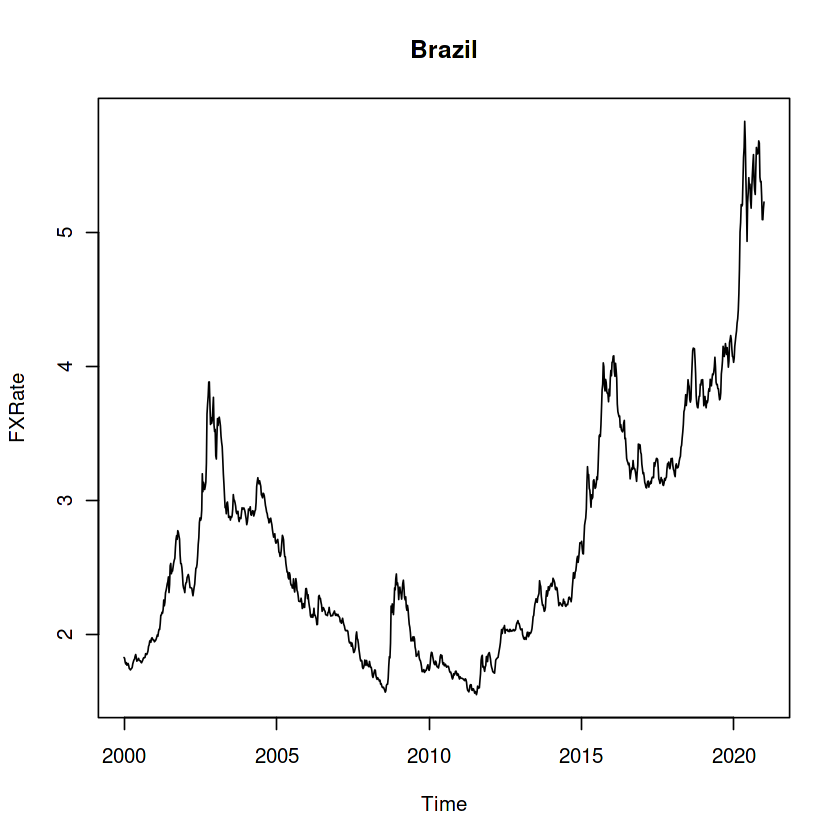

In [100]:
plot(train_dates,train_week,type="l",xlab="Time",ylab="FXRate",main="Brazil")

In [30]:
train <- ts(as.numeric(train_week), end=length(train_week))
test <- ts(as.numeric(test_week), start = length(train_week)+1,
           end = (length(train_week) + length(test_week)))
#converting to time series

In [33]:
train[1:10]

[1] 1.826643 1.820786 1.792071 1.778143 1.788857 1.769286 1.773857 1.782000
 [9] 1.767571 1.744571

In [34]:
length(train)
length(test)

[1] 1096

[1] 45

In [35]:
install.packages("WaveletArima")
library(WaveletArima)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [36]:
library(tseries)
library(forecast)
library(Metrics)
library(ggplot2)
library(stringi)
library(readr)
# library(WaveletArima)
library(caret)
library(nnfor)
library(tsDyn)
library(fracdiff)
library(bsts)
library(forecastHybrid)
library(e1071)
library(tseriesChaos)
library(pracma)
library(Kendall)
# library(nonlinearTseries)
# library(GeneCycle)
library(fpp2)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Registered S3 method overwritten by 'greybox':
  method     from
  print.pcor lava


Attaching package: ‘tsDyn’


The following object is masked from ‘package:Metrics’:

    mse


Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


A

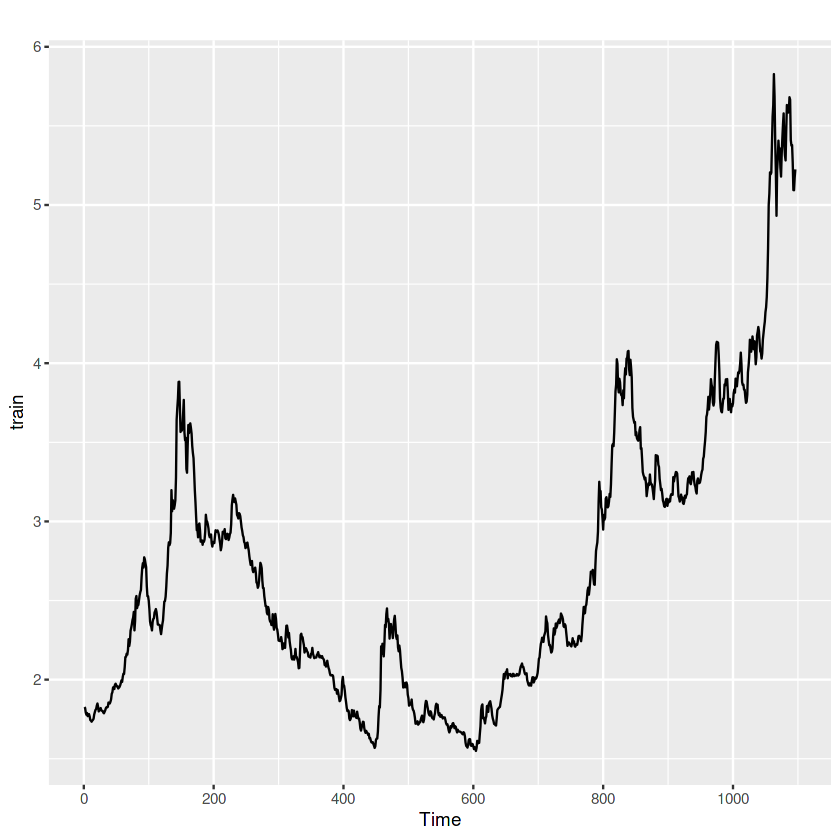

In [37]:
autoplot(train)

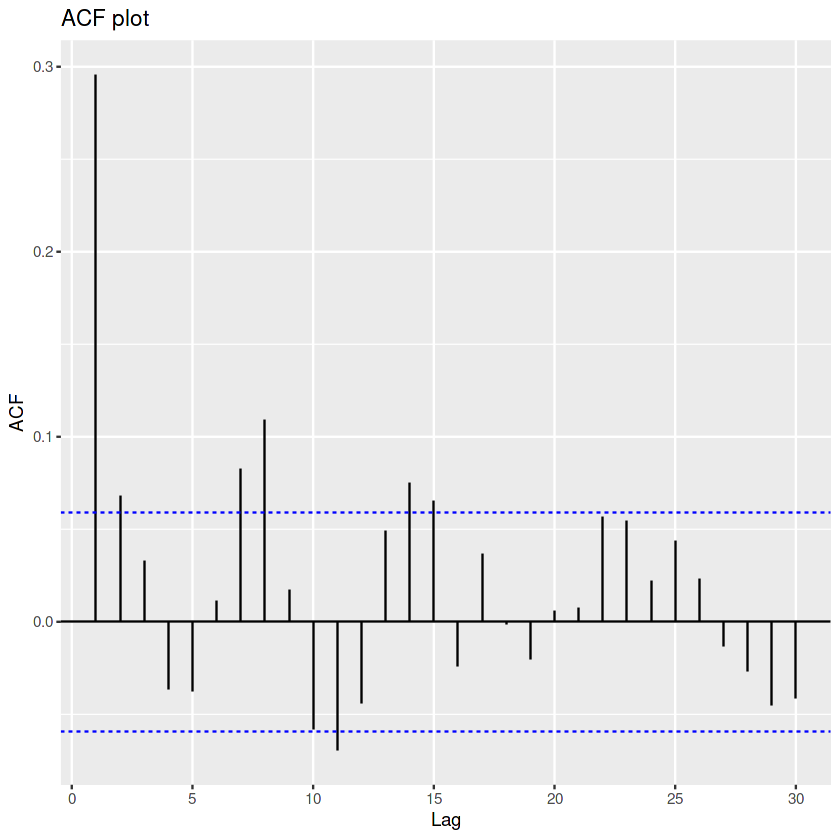

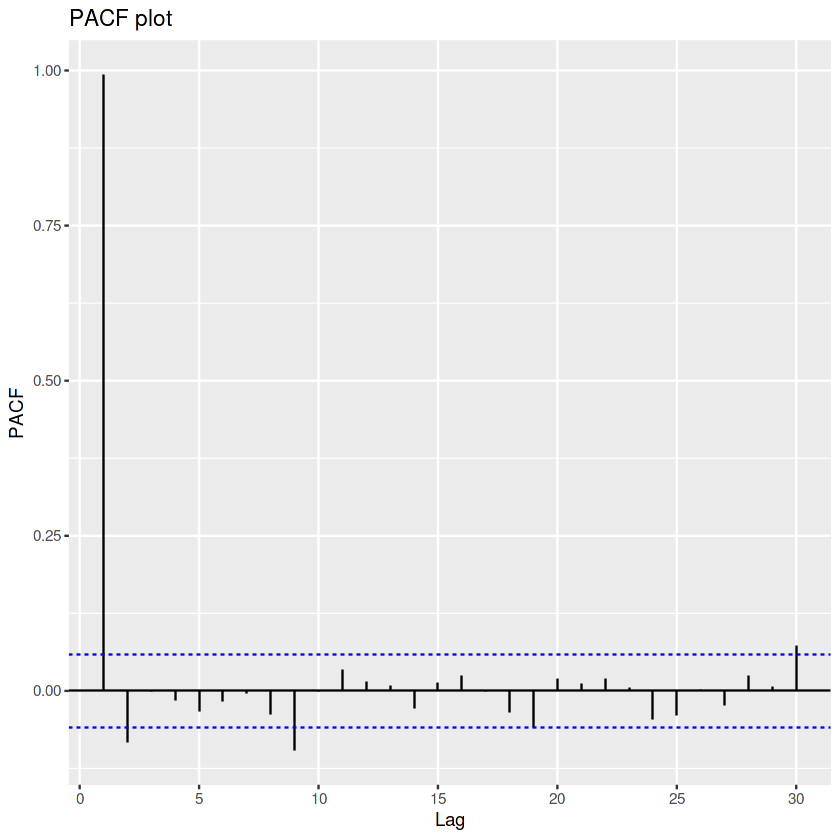

In [38]:
#ACF & PACF plots
#diffcase=ndiffs(train)
diffset = diff(train, differences = ndiffs(train))

ggAcf(diffset) +
  ggtitle("ACF plot")

ggPacf(train) +
  ggtitle("PACF plot")

In [39]:
kpss.test(train)  #p value is < 0.05... So,reject null hypothesis and accept alternative hypothisis which is non stationary 

Warning message in kpss.test(train):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  train
KPSS Level = 5.4646, Truncation lag parameter = 7, p-value = 0.01


In [41]:
Box.test(train)  #p<0.01... So, no seriel correlation exists


	Box-Pierce test

data:  train
X-squared = 1083.3, df = 1, p-value < 2.2e-16


In [42]:
skewness(train)   #Right Skew

[1] 1.109236

In [43]:
kurtosis(train)   #Peaked distribution

[1] 0.9486601

In [44]:
hurstexp(train)  #Emperical

Simple R/S Hurst estimation:         0.8508158 
Corrected R over S Hurst exponent:   0.9928907 
Empirical Hurst exponent:            0.9727742 
Corrected empirical Hurst exponent:  0.9541271 
Theoretical Hurst exponent:          0.5381524 


In [45]:
terasvirta.test(train) 
#Also a test for linearity... p-value is greater than 0.05, hence linear trend


	Teraesvirta Neural Network Test

data:  train
X-squared = 5.312, df = 2, p-value = 0.07023


In [46]:
#Non-Chaotic
max_lyapunov_expo <-lyap_k(train, m=1, d=2, s=1, t=4, ref=length(train), k=2, eps=4); max_lyapunov_expo

Finding nearests
Keeping  1096  reference points
Following points


A Time Series:
[1] -6.497258

# **Models**

Series: train 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.2983
s.e.  0.0288

sigma^2 estimated as 0.002671:  log likelihood=1690.83
AIC=-3377.66   AICc=-3377.65   BIC=-3367.66

Training set error measures:
                     ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.00219166 0.05163403 0.03360286 0.05965245 1.189076 0.9524217
                    ACF1
Training set 0.004108924

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00219166,0.05163403,0.03360286,0.05965245,1.189076,0.9524217,0.004108924,NA
Test set,0.11361256,0.22634071,0.18274849,1.98883264,3.350465,5.1797260,0.887582549,2.491994


[1] 0.03414092

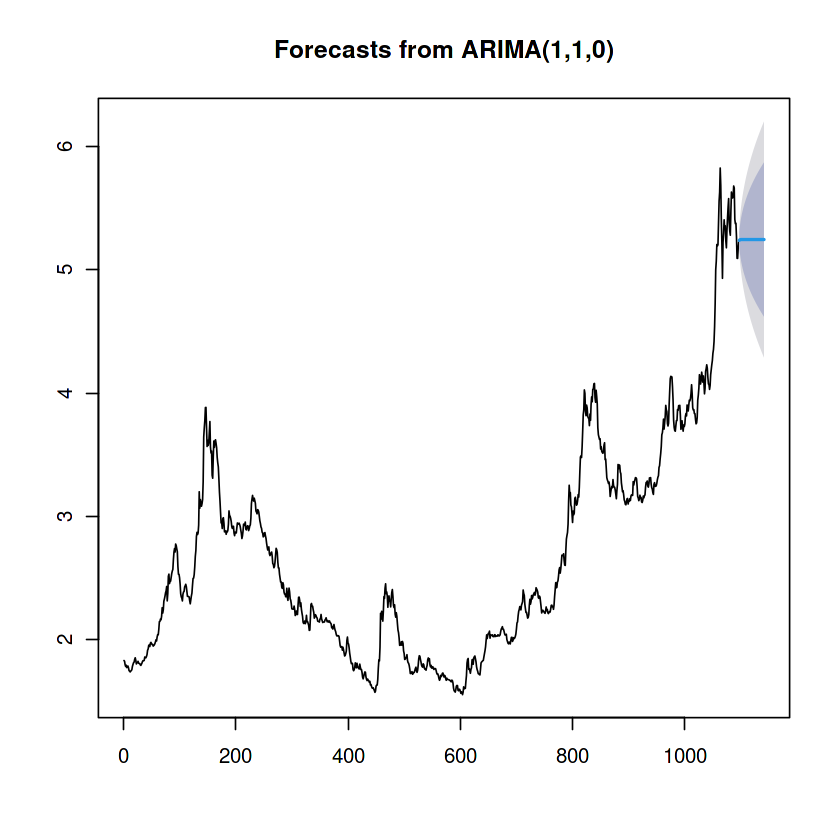

In [47]:
#ARIMA - Classical
fitARIMA = auto.arima(train) 
summary(fitARIMA)
predARIMA = forecast::forecast(fitARIMA,h=length(test))
plot(predARIMA)

a1<-forecast::accuracy(predARIMA, test);a1
smape(test,predARIMA$mean)

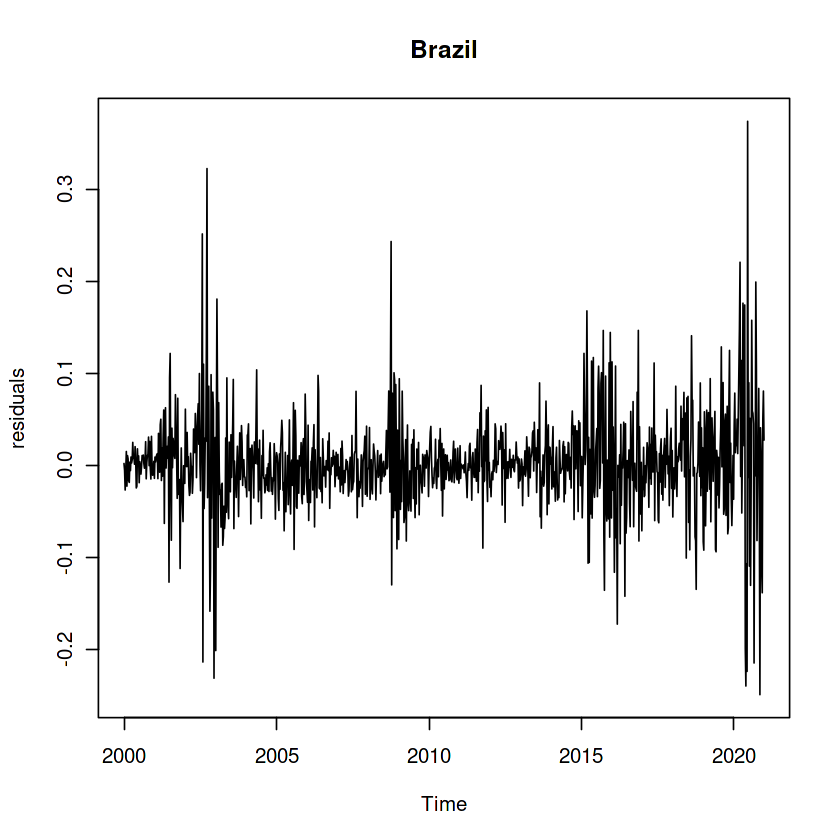

In [65]:
#ARIMA Residuals plot
plot(train_dates,fitARIMA$residuals,type="l",xlab="Time",ylab="residuals",main="Brazil")

ETS(M,Ad,N) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.9986 
    beta  = 0.25 
    phi   = 0.8 

  Initial states:
    l = 1.8308 
    b = -0.0204 

  sigma:  0.017

     AIC     AICc      BIC 
787.5855 787.6626 817.5820 

Training set error measures:
                     ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.00160494 0.05269905 0.03408837 0.04816829 1.202659 0.9661826
                 ACF1
Training set 0.112418

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00160494,0.05269905,0.03408837,0.04816829,1.202659,0.9661826,0.1124180,NA
Test set,0.09906208,0.22011429,0.18022682,1.71649551,3.311988,5.1082529,0.8898988,2.430073


[1] 0.03366185

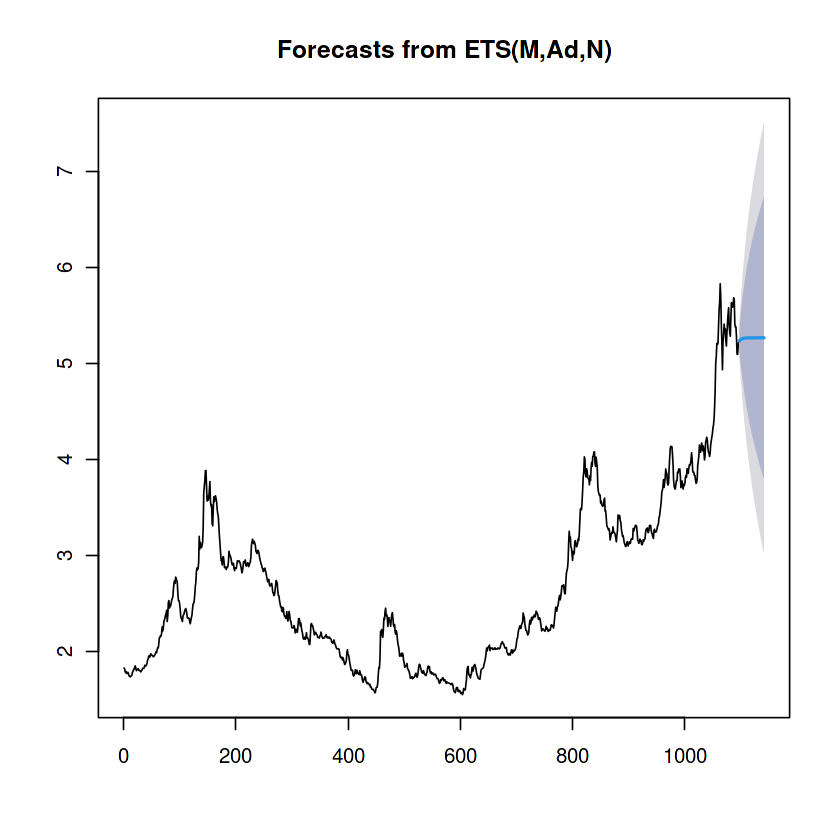

In [67]:
# fitting ETS  -- Smoothing Basic
fitETS=ets(train)
summary(fitETS)
predETS=forecast::forecast(fitETS, h=length(test))
plot(predETS)

a2<-forecast::accuracy(predETS, test);a2
smape(test,predETS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1565893,0.2493783,0.1978571,2.793225,3.611615,0.8802081,2.734466


[1] 0.03703159

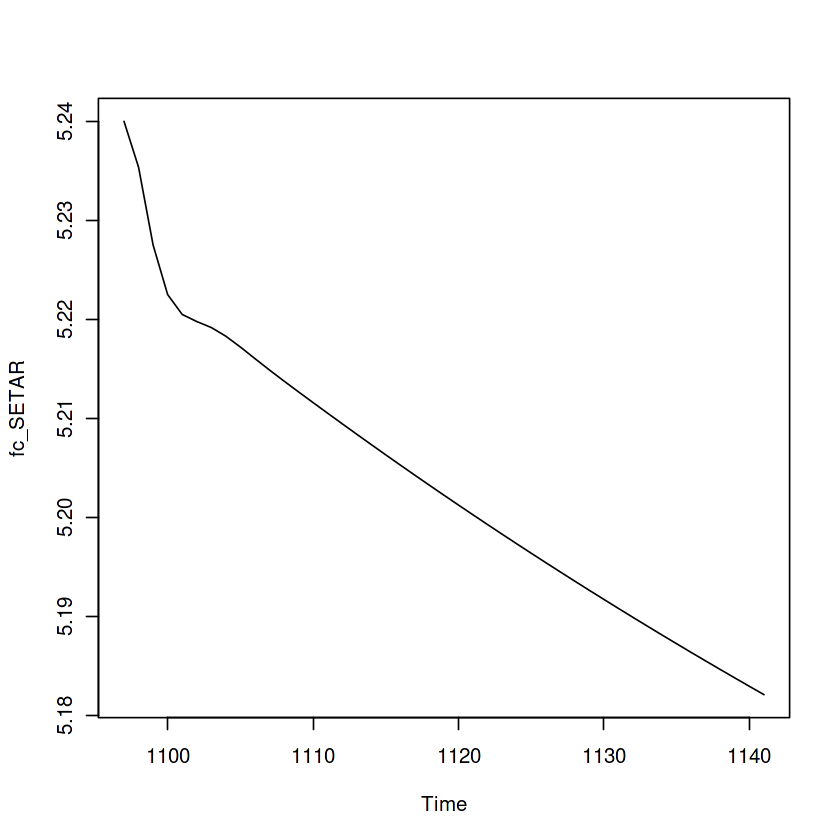

In [68]:
#SETAR - Classical
fit_SETAR = setar(train, m=4)
fc_SETAR = predict(fit_SETAR, n.ahead = length(test))
plot(fc_SETAR)
#How to determine M?

a3<-forecast::accuracy(fc_SETAR, test);a3
smape(test, fc_SETAR)

                  Length Class  Mode     
lambda               1   -none- numeric  
alpha                1   -none- numeric  
beta                 0   -none- NULL     
damping.parameter    0   -none- NULL     
gamma.values         0   -none- NULL     
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          1   -none- numeric  
fitted.values     1096   ts     numeric  
errors            1096   ts     numeric  
x                 1096   -none- numeric  
seasonal.periods     0   -none- NULL     
y                 1096   ts     numeric  
call                 2   -none- call     
series               1   -none- character
method               1   -none- character

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00231538,0.05172692,0.03373409,0.06199921,1.192579,0.956141,0.01271041,NA
Test set,0.12613296,0.23292262,0.18686768,2.22269670,3.420905,5.296478,0.88709724,2.560316


[1] 0.03492617

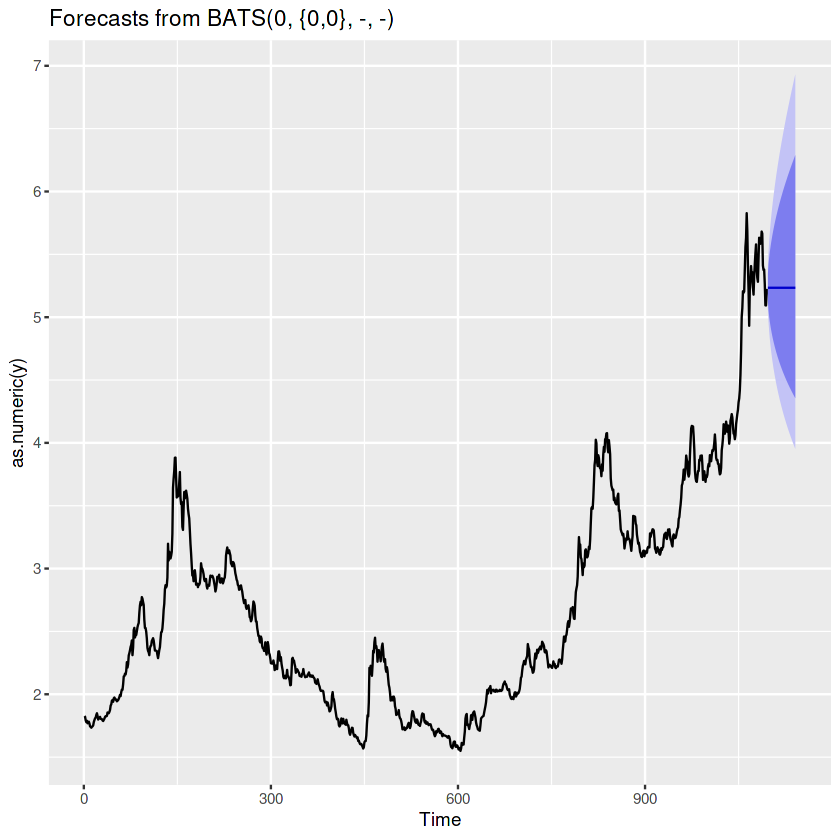

In [69]:
#TBATS - Smotthing
fit_tbats = tbats(train)
summary(fit_tbats)
predTBATS=forecast::forecast(fit_tbats, h=length(test))
autoplot(predTBATS)

a4<-forecast::accuracy(predTBATS, test);a4
smape(test,predTBATS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1169652,0.2297394,0.1865129,2.050286,3.419572,0.8917424,2.528282


[1] 0.03485995

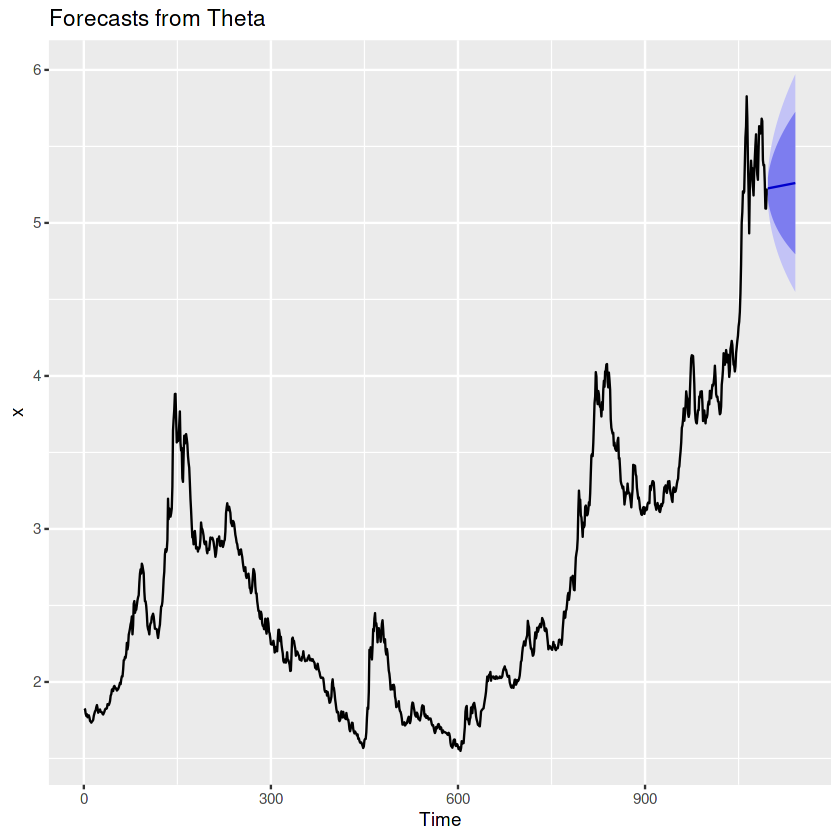

In [70]:
#Theta -- Smotthing
fit_theta=thetaf(train, h=length(test))
autoplot(fit_theta)

a5<-forecast::accuracy(fit_theta$mean, test);a5
smape(test,fit_theta$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.7552675,0.8145477,0.7552675,14.01383,14.01383,0.8616999,9.127019


[1] 0.1525058

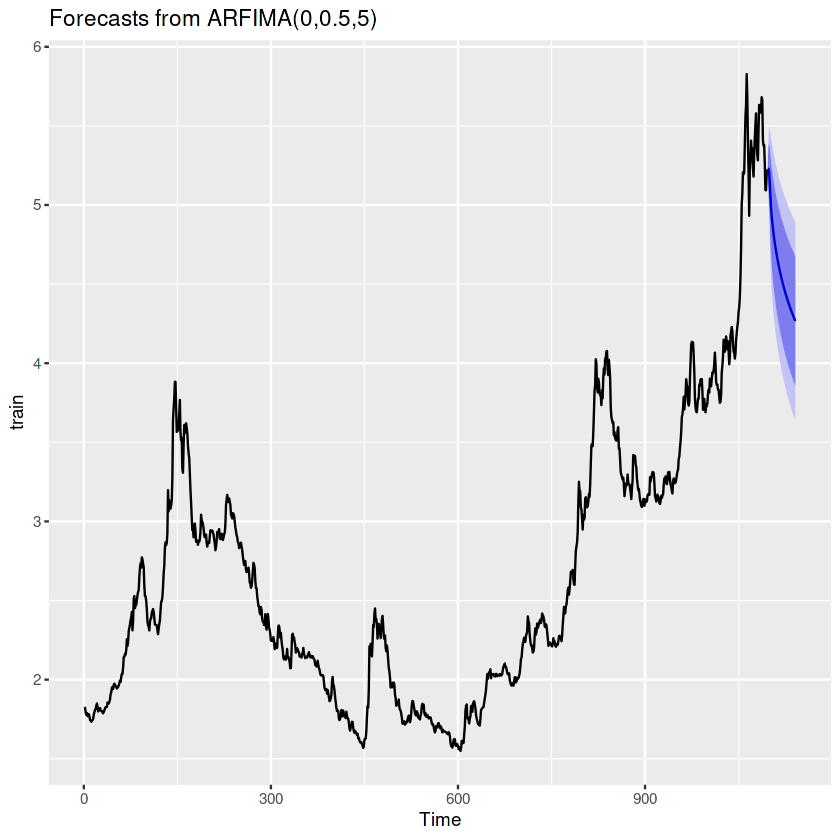

In [71]:
#ARFIMA model -- Classical
fit_ARFIMA=arfima(train)
predARFIMA = forecast::forecast(fit_ARFIMA, h=length(test))
autoplot(predARFIMA)

a6<-forecast::accuracy(predARFIMA$mean, test);a6
smape(test,predARFIMA$mean)

In [ ]:
# #fitting ANN -- ML Model
# fit_ANN = mlp(train)
# predANN = forecast::forecast(fit_ANN, h=length(test))
# autoplot(predANN)

# a7<-forecast::accuracy(predANN$mean, test);a7
# smape(test,predANN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.04106906,0.2033616,0.1699065,-0.9017478,3.200773,0.895006,2.342664


[1] 0.03168741

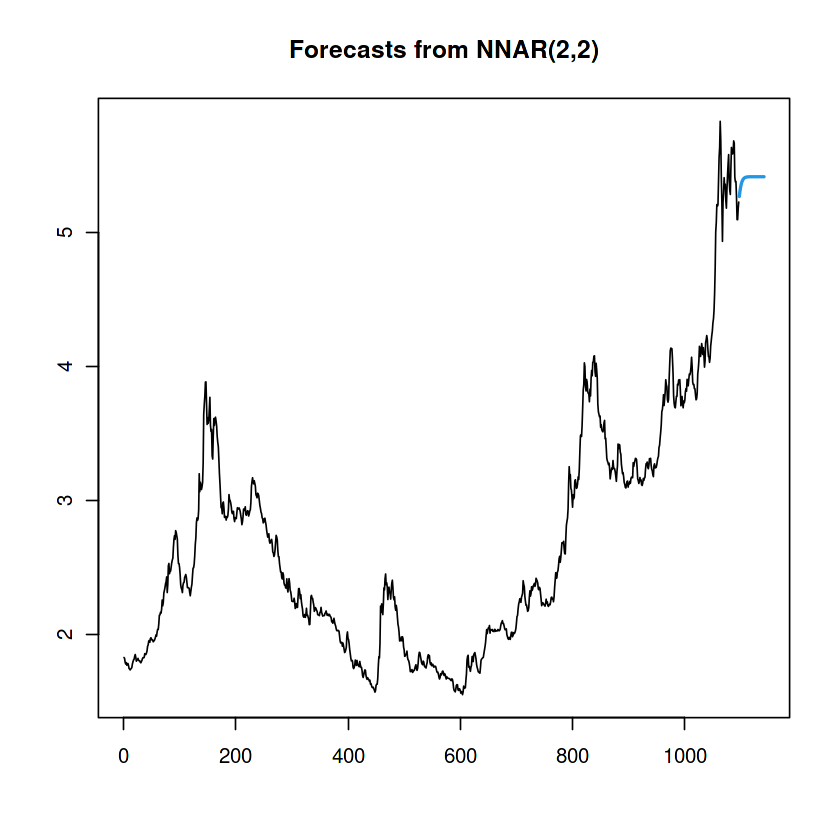

In [72]:
#fitting ARNN model -- ML Model
fit_ARNN = nnetar(train)
predARNN=forecast::forecast(fit_ARNN, h= length(test))
plot(predARNN)

a8<-forecast::accuracy(predARNN$mean, test);a8
smape(test, predARNN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.111315,0.2252336,0.1820041,1.94588,3.33772,0.887184,2.480914


[1] 0.03399919

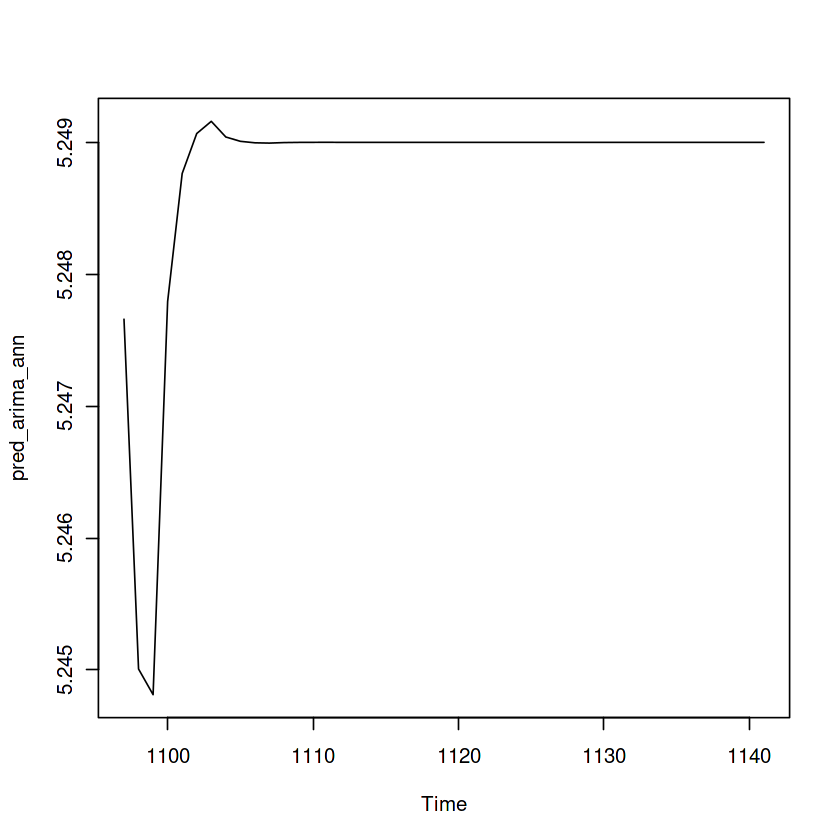

In [73]:
#fitting ARIMA + ANN hyybrid
fit_res_ANN=mlp(fitARIMA$residuals)
pred_res_ANN = forecast::forecast(fit_res_ANN, h=length(test))
pred_arima_ann=predARIMA$mean+pred_res_ANN$mean
plot(pred_arima_ann)

a9<-forecast::accuracy(pred_arima_ann, test);a9
smape(test,pred_arima_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1053893,0.2230887,0.1810576,1.8349,3.3232,0.8852135,2.457785


[1] 0.03382139

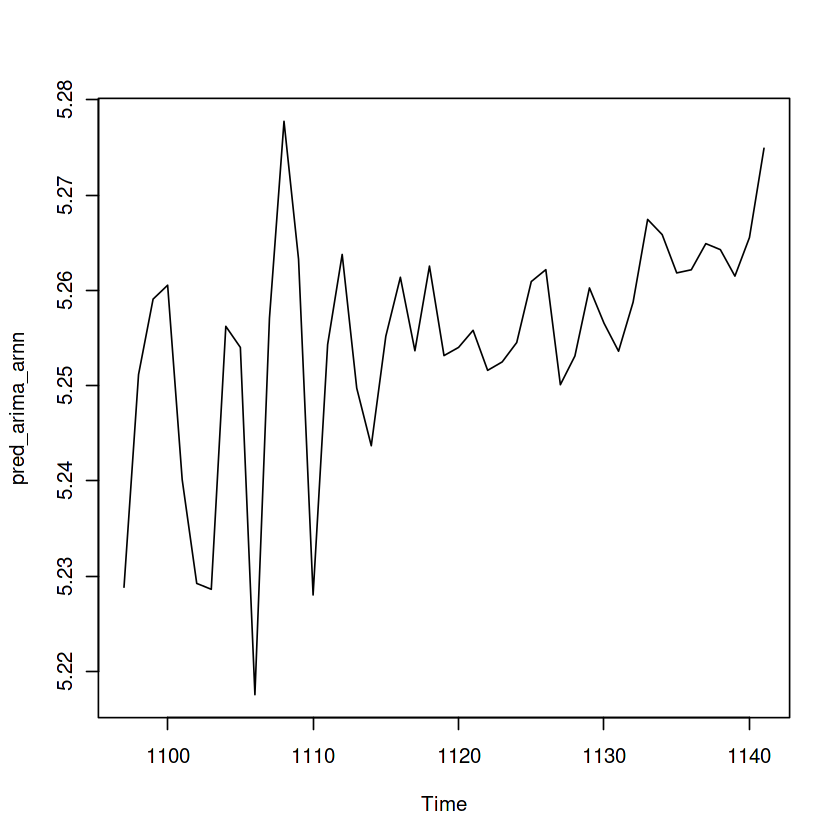

In [75]:
#fitting ARIMA + ARNN hybrid
fit_res_ARNN=nnetar(fitARIMA$residuals)
pred_res_ARNN = forecast::forecast(fit_res_ARNN, h=length(test))
pred_arima_arnn=predARIMA$mean+pred_res_ARNN$mean
plot(pred_arima_arnn)

a10<-forecast::accuracy(pred_arima_arnn, test);a10
smape(test,pred_arima_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1151302,0.2278576,0.1848454,2.016619,3.389399,0.8897357,2.508356


[1] 0.03454099

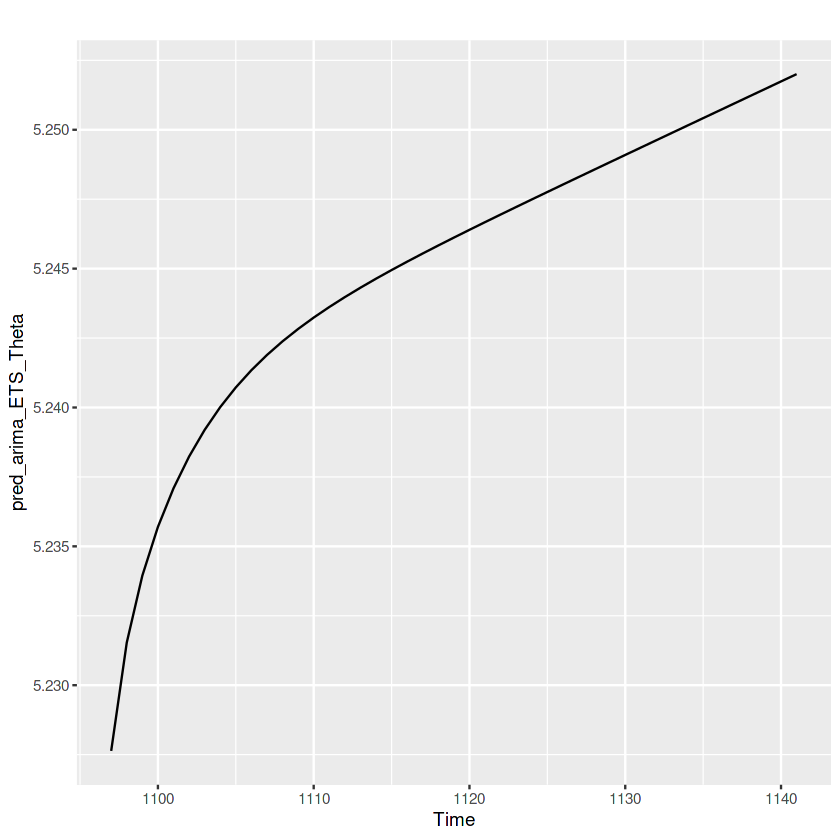

In [76]:
#ARIMA+ETS+THETA
pred_arima_ETS_Theta = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*fit_theta$mean))
autoplot(pred_arima_ETS_Theta)

a11<-forecast::accuracy(pred_arima_ETS_Theta, test);a11
smape(test,pred_arima_ETS_Theta)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06250474,0.2064278,0.172347,1.033592,3.185465,0.8914468,2.29876


[1] 0.032168

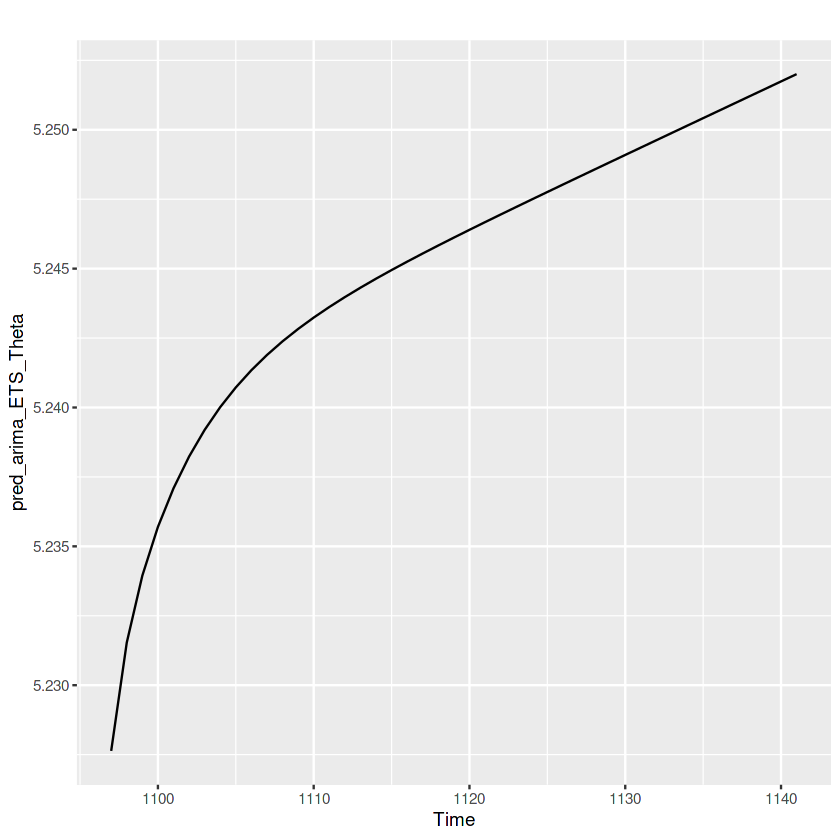

In [77]:
#ARIMA+ETS+ARNN
pred_arima_ETS_ARNN = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_ETS_Theta)

a12<-forecast::accuracy(pred_arima_ETS_ARNN, test);a12
smape(test,pred_arima_ETS_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06846649,0.2086385,0.1738196,1.144744,3.209526,0.8921087,2.319434


[1] 0.0324468

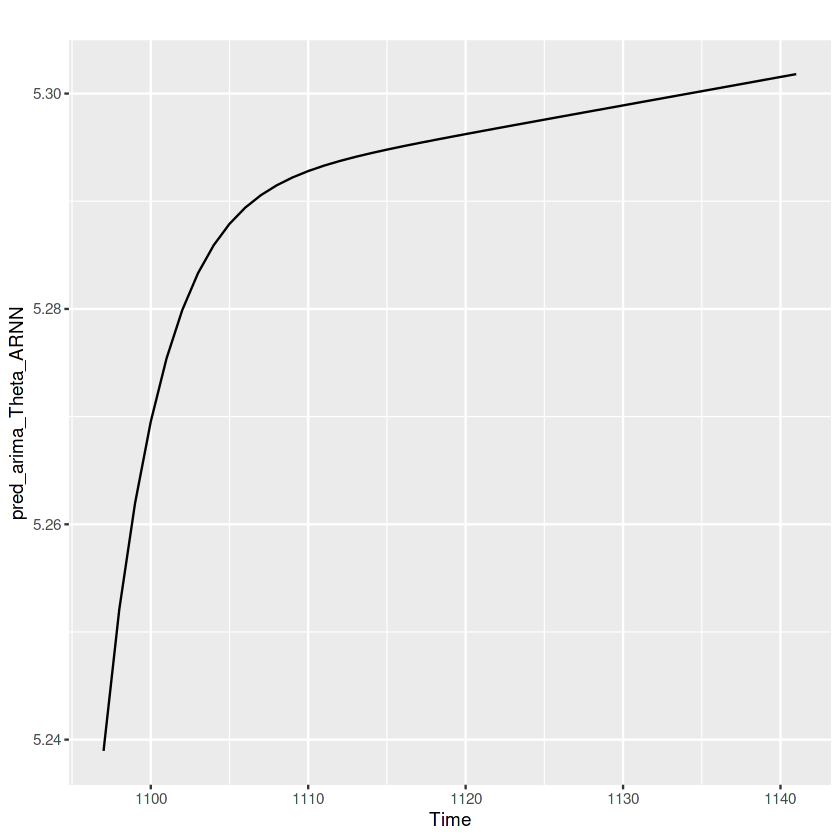

In [78]:
#ARIMA+theta+ARNN
pred_arima_Theta_ARNN = ((0.333*predARIMA$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_Theta_ARNN)

a13<-forecast::accuracy(pred_arima_Theta_ARNN, test);a13
smape(test,pred_arima_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06362118,0.2074536,0.1737007,1.054056,3.21036,0.89279,2.309575


[1] 0.03242446

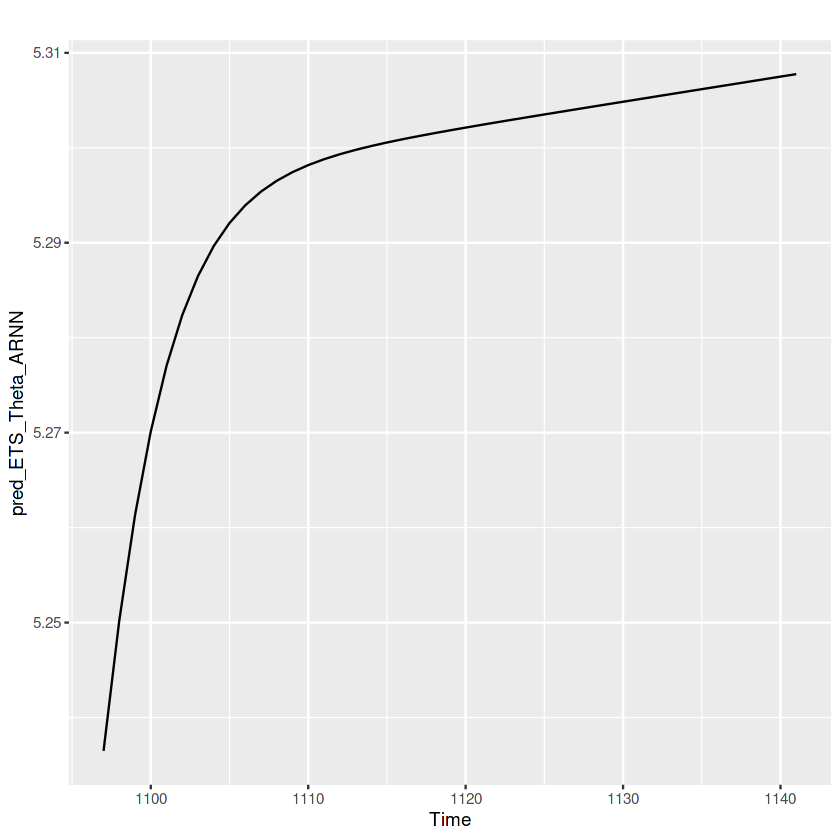

In [79]:
#ETS+theta+ARNN
pred_ETS_Theta_ARNN = ((0.333*predETS$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

In [80]:
#ANN+ARNN+WARIMA

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.113969,0.2278812,0.1809299,2.013963,3.323812,0.8945639,2.513527


[1] 0.03393793

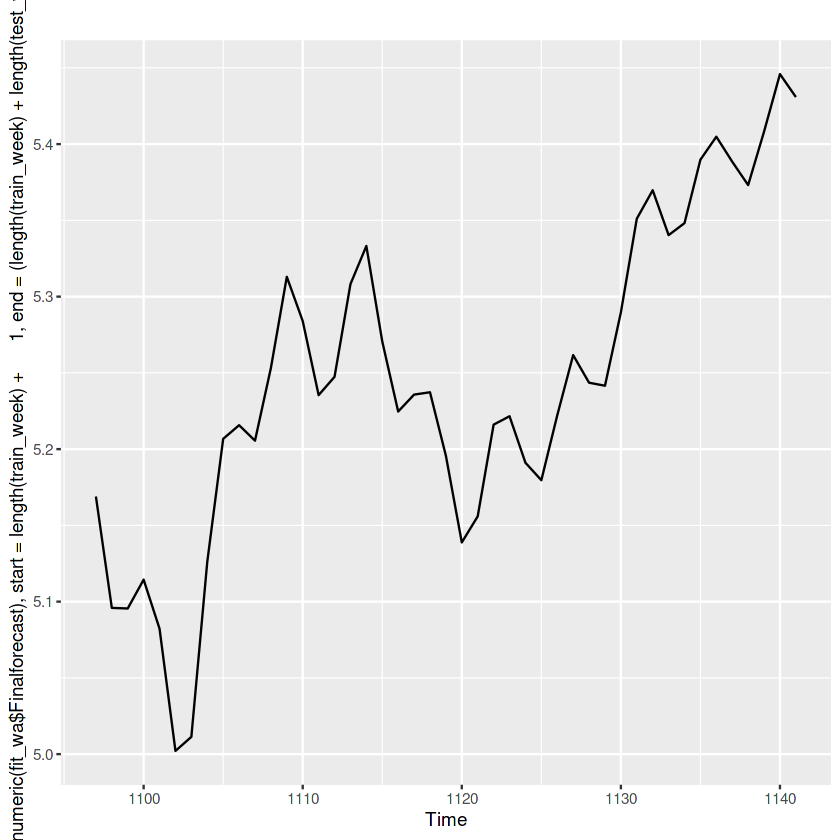

In [83]:
#WaveletArima -- Advanced
fit_wa <- WaveletFittingarma(train, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))
autoplot(ts(as.numeric(fit_wa$Finalforecast), start = length(train_week)+1, end = (length(train_week) + length(test_week))))

a15<-forecast::accuracy(fit_wa$Finalforecast, test);a15
smape(test,fit_wa$Finalforecast)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1157936,0.2311683,0.1833009,2.047239,3.367439,0.8942377,2.548636


[1] 0.03439866

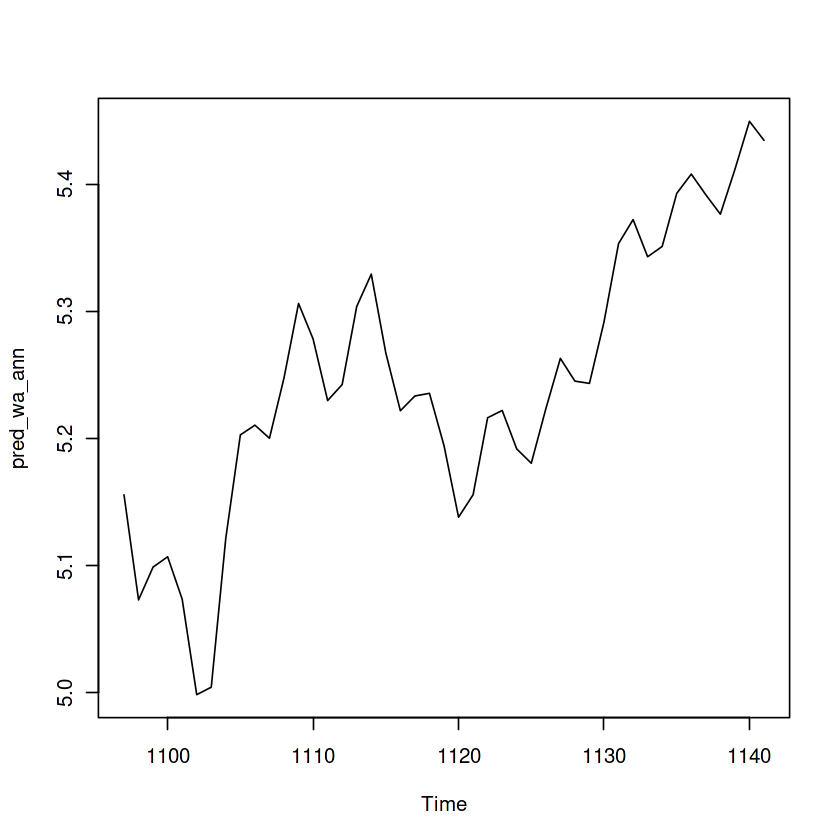

In [84]:
#fitting WARIMA+ANN hybrid model
res_wa = train - fit_wa$FinalPrediction
fit_wa_ANN=mlp(res_wa)
pred_wa_ANN = forecast::forecast(fit_wa_ANN, h=length(test))
pred_wa_ann=fit_wa$Finalforecast+pred_wa_ANN$mean
a16<-forecast::accuracy(pred_wa_ann, test);a16
plot(pred_wa_ann)

smape(test,pred_wa_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1131656,0.231138,0.1828972,1.997509,3.360868,0.8948473,2.552589


[1] 0.03432475

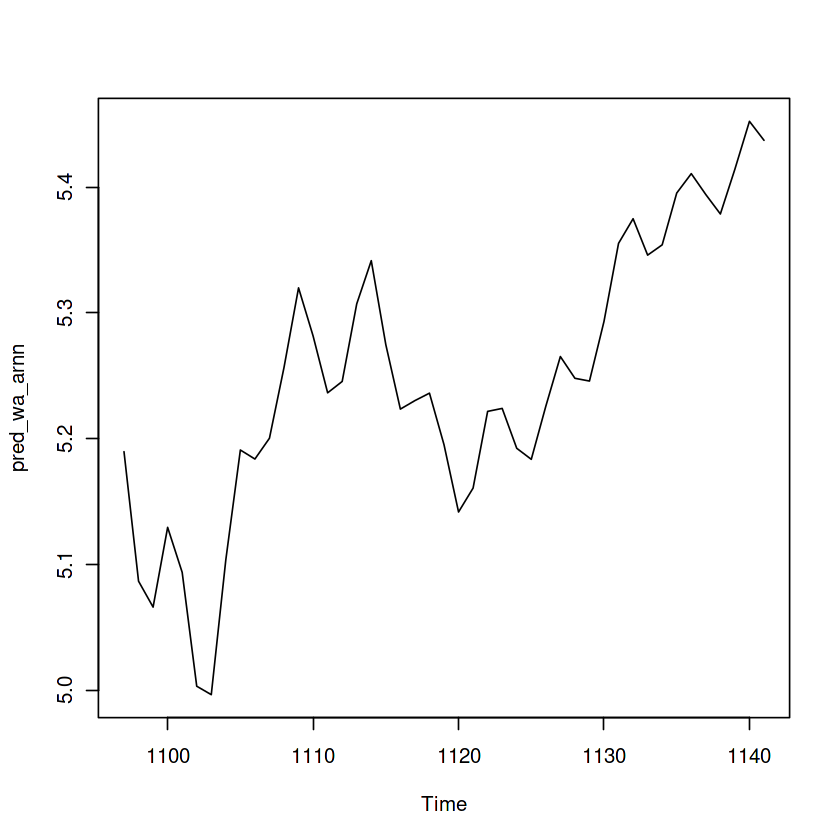

In [85]:
#fitting WARIMA + ARNN hybrid model
fit_wa_ARNN = nnetar(res_wa)
pred_wa_ARNN = forecast::forecast(fit_wa_ARNN, h=length(test))
pred_wa_arnn=fit_wa$Finalforecast+pred_wa_ARNN$mean
a17<-forecast::accuracy(pred_wa_arnn, test);a17
plot(pred_wa_arnn)

smape(test,pred_wa_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1046129,0.2227817,0.1820326,1.820388,3.342772,0.8864913,2.456166


[1] 0.03400749

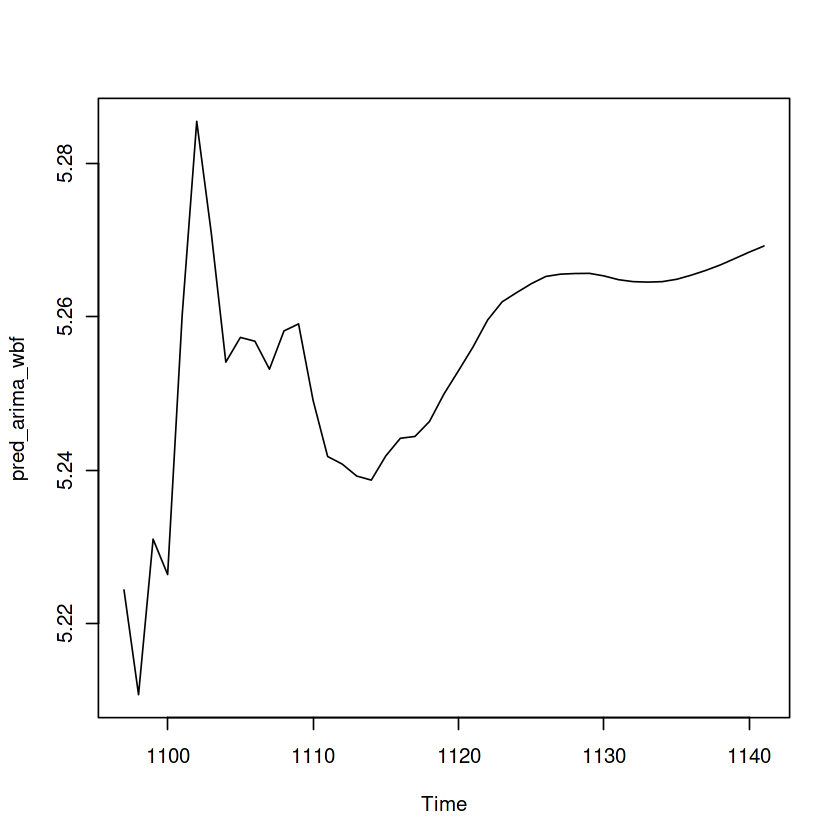

In [87]:
#fitting ARIMA + WARIMA hybrid model
fit_res_wbf=WaveletFittingarma(fitARIMA$residuals, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))

pred_arima_wbf=predARIMA$mean+fit_res_wbf$Finalforecast
a18<-forecast::accuracy(pred_arima_wbf, test);a18
plot(pred_arima_wbf)

smape(test,pred_arima_wbf)

=-=-=-=-= Iteration 0 Tue Dec 21 13:48:02 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Tue Dec 21 13:48:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 1800 Tue Dec 21 13:48:17 2021 =-=-=-=-=
=-=-=-=-= Iteration 2700 Tue Dec 21 13:48:25 2021 =-=-=-=-=
=-=-=-=-= Iteration 3600 Tue Dec 21 13:48:33 2021 =-=-=-=-=
=-=-=-=-= Iteration 4500 Tue Dec 21 13:48:40 2021 =-=-=-=-=
=-=-=-=-= Iteration 5400 Tue Dec 21 13:48:48 2021 =-=-=-=-=
=-=-=-=-= Iteration 6300 Tue Dec 21 13:48:55 2021 =-=-=-=-=
=-=-=-=-= Iteration 7200 Tue Dec 21 13:49:03 2021 =-=-=-=-=
=-=-=-=-= Iteration 8100 Tue Dec 21 13:49:10 2021 =-=-=-=-=


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06622212,0.2155141,0.1817645,1.099529,3.359934,0.9040929,2.396973


[1] 0.03396278

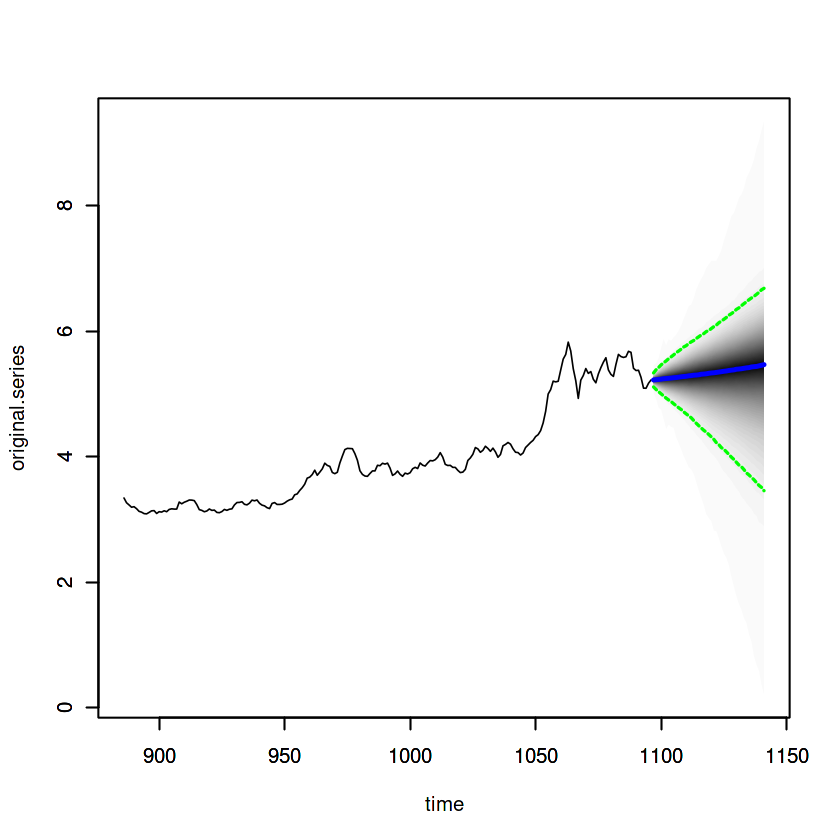

In [88]:
#fitting BSTS model -- Advanced
ss <- AddLocalLinearTrend(list(), train)
fit_bsts=bsts(train,state.specification = ss, niter = 9000)
predBSTS <- predict(fit_bsts, horizon = length(test))
plot(predBSTS, plot.original = 211)

burn <- SuggestBurn(0.1, fit_bsts)
fitted_bsts=as.numeric(-colMeans(fit_bsts$one.step.prediction.errors[-(1:burn),])+train)

a19<-forecast::accuracy(predBSTS$mean, test);a19
smape(test,predBSTS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1351978,0.2379535,0.1906314,2.39204,3.486894,0.8870972,2.612917


[1] 0.03564524

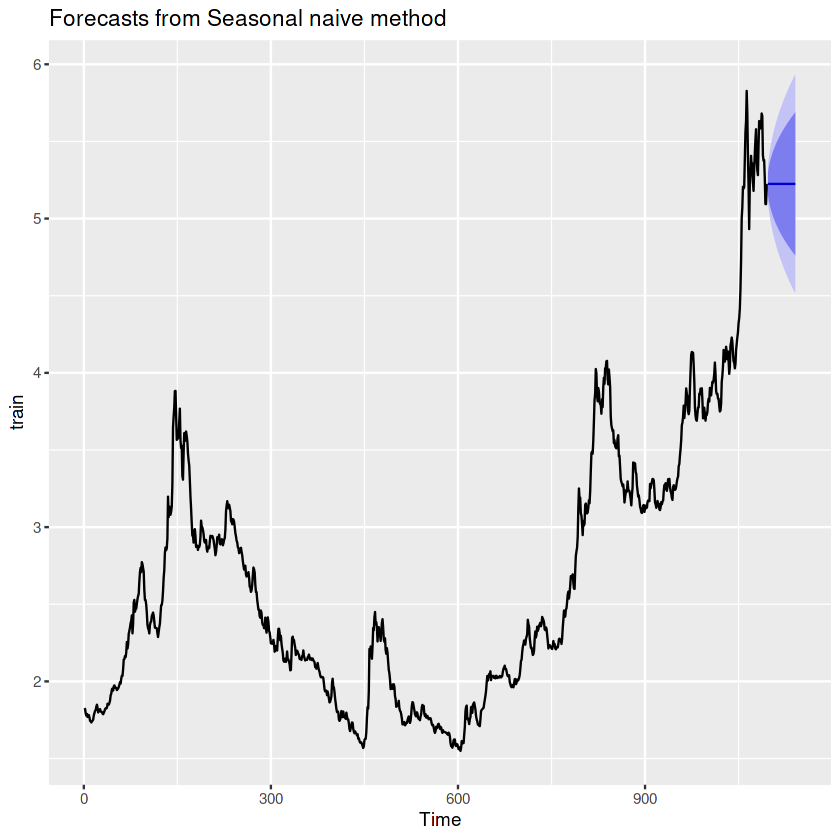

In [89]:
#Snaive - ARIMA(0,0,0)(0,1,0)m  --  Classical
fit_snaive = snaive(train, h=length(test))
autoplot(fit_snaive)

a20<-forecast::accuracy(fit_snaive$mean, test);a20
smape(test,fit_snaive$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1352029,0.2379564,0.1906338,2.392136,3.486937,0.8870972,2.612947


[1] 0.0356457

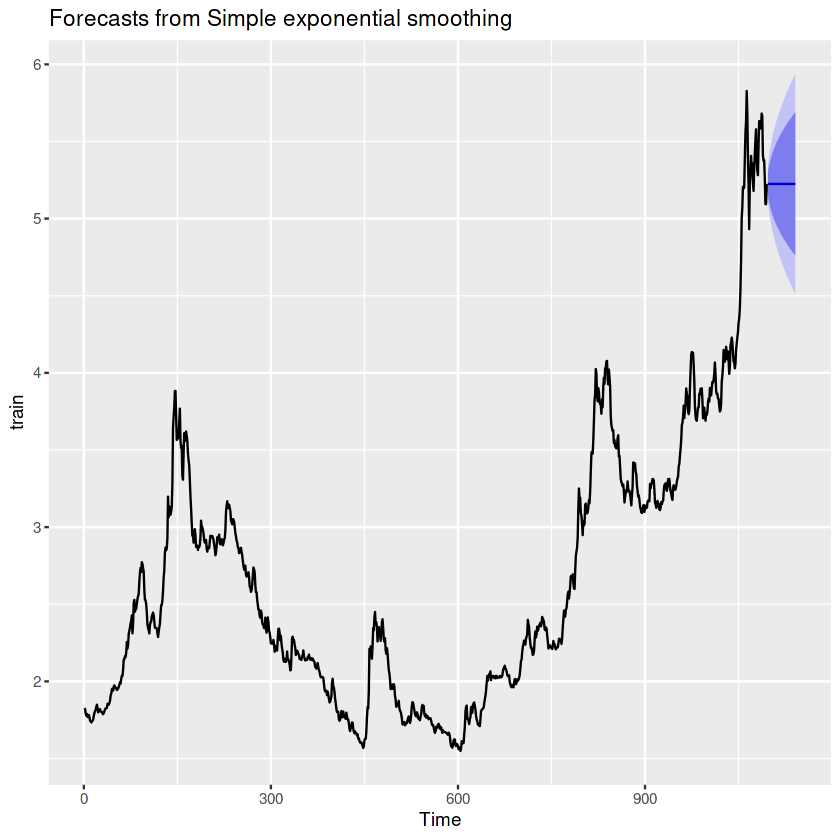

In [90]:
#Ses --  Simple exponential smoothing
fit_ses = ses(train, h=length(test))
autoplot(fit_ses)

a21<-forecast::accuracy(fit_ses$mean, test);a21
smape(test,fit_ses$mean)

**Catboost**

In [91]:
# Importing Catboost
failed_loading_catboost = FALSE
tryCatch(library(catboost), error = function(err) {failed_loading_catboost<<-TRUE})

In [92]:
# Initializing Catboost parameters
embedded_series <- NULL
series_means <- NULL
mean <- mean(train)
train_cat <- train/mean
series_means <- c(series_means, mean)
embedded <- embed(train_cat, lag + 1)
embedded_series <- rbind(embedded_series, embedded)

final_lags <- NULL
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_cat <- rbind(final_lags, current_series_final_lags)

In [93]:
# Fitting the CatBoost model
if (failed_loading_catboost) stop("Error when loading catboost, cannot run global model based on catboost")
    train_pool <- catboost.load_pool(data = as.matrix(embedded_series[,-1]),label=as.matrix(embedded_series[,1]))
    model_cat <- catboost.train(train_pool)

Training catboost with default parameters! See help(catboost.train).



Learning rate set to 0.039666
0:	learn: 0.3267275	total: 50.1ms	remaining: 50s
1:	learn: 0.3152163	total: 51.2ms	remaining: 25.6s
2:	learn: 0.3037840	total: 52.5ms	remaining: 17.5s
3:	learn: 0.2925434	total: 53.7ms	remaining: 13.4s
4:	learn: 0.2821640	total: 55.7ms	remaining: 11.1s
5:	learn: 0.2721307	total: 57.2ms	remaining: 9.48s
6:	learn: 0.2622931	total: 58.8ms	remaining: 8.34s
7:	learn: 0.2526864	total: 60ms	remaining: 7.45s
8:	learn: 0.2439553	total: 60.9ms	remaining: 6.71s
9:	learn: 0.2353699	total: 62ms	remaining: 6.14s
10:	learn: 0.2268051	total: 63.1ms	remaining: 5.67s
11:	learn: 0.2188611	total: 64.1ms	remaining: 5.28s
12:	learn: 0.2112559	total: 64.8ms	remaining: 4.92s
13:	learn: 0.2039082	total: 65.6ms	remaining: 4.62s
14:	learn: 0.1965543	total: 66.8ms	remaining: 4.39s
15:	learn: 0.1892830	total: 68.3ms	remaining: 4.2s
16:	learn: 0.1828586	total: 69.4ms	remaining: 4.01s
17:	learn: 0.1762847	total: 70.5ms	remaining: 3.84s
18:	learn: 0.1700341	total: 71.7ms	remaining: 3.7s


In [94]:
# Predictions in Catboost model
predictions <- NULL
for (i in 1:length(test)){
    catboost_final_lags <- catboost.load_pool(final_lags_cat)
    new_predictions <- catboost.predict(model_cat, catboost_final_lags)
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_cat <- final_lags_cat[-lag]
      final_lags_cat <- cbind(new_predictions, final_lags_cat)
      colnames(final_lags_cat)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_cat <- as.data.frame(final_lags_cat)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred = as.numeric(pred)
predictions_cat <- pred * as.vector(series_means)

In [95]:
# Catboots Accuracy
smape(test,predictions_cat)
a23<-forecast::accuracy(predictions_cat,test);a23

[1] 0.04251039

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.2005239,0.2801329,0.2262893,3.612571,4.126711,0.8892797,3.061284


**Pool regression**

In [96]:
# Initializing Pool regression paramters
final_lags_poolreg <- final_lags
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_poolreg <- rbind(final_lags_poolreg, current_series_final_lags)
colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")

embedded_series <- as.data.frame(embedded_series)
colnames(embedded_series)[1] <- "y"
colnames(embedded_series)[2:(lag + 1)] <- paste("Lag", 1:lag, sep = "")

formula <- "y ~ "
  for(predictor in 2:ncol(embedded_series)){
    if(predictor != ncol(embedded_series)){
      formula <- paste0(formula, colnames(embedded_series)[predictor], " + ")
    }else{
      formula <- paste0(formula, colnames(embedded_series)[predictor])
    }
  }

formula <- paste(formula, "+ 0", sep="")
formula <- as.formula(formula)

In [97]:
# Fitting Pool Regression model
model_pool_reg <- glm(formula = formula, data = embedded_series)

In [98]:
# Predictions in Pool regression model
predictions <- NULL
for (i in 1:length(test)){
    new_predictions <- predict.glm(object = model_pool_reg, newdata = as.data.frame(final_lags_poolreg))
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_poolreg <- final_lags_poolreg[-lag]
      final_lags_poolreg <- cbind(new_predictions, final_lags_poolreg)
      colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_poolreg <- as.data.frame(final_lags_poolreg)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred <- as.numeric(pred)
predictions_poolreg <- pred * as.vector(series_means)

In [99]:
# Pool regression model accuracy
smape(test,predictions_poolreg)
a24 <- forecast::accuracy(test,predictions_poolreg); a24

[1] 0.03629979

,ME,RMSE,MAE,MPE,MAPE
Test set,0.01042886,0.2246779,0.1943399,0.1610944,3.625312


In [102]:
#Saving The model fitted and predicted values for visualisation 

library(rlist)
org <- list(train,test)
t1 <- c(as.numeric(Map("+", fitted(fitARIMA), fit_res_wbf$FinalPrediction)))
hyb <- list(t1,pred_arima_wbf)
rnn <- list(fitted(fit_ARNN), predARNN$mean)

list.save(org, 'br_original.json', type = "JSON")
list.save(hyb, 'hyb_br.json', type = "JSON")
list.save(rnn, 'arnn_br.json', type = "JSON")

In [103]:
t3 <- list(train_dates,test_dates)
list.save(t3, 'dates.json', type = "JSON")